# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
#Librerias

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/AdvancedMethodsDataAnalysisClass/master/datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Price'>

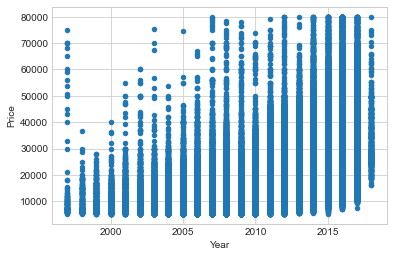

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

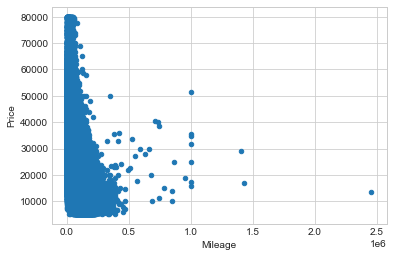

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

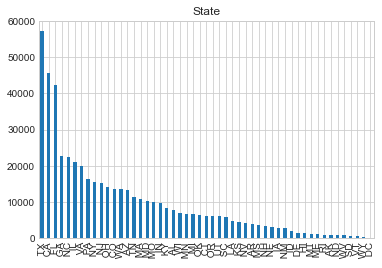

In [9]:

pd.value_counts(data['State'])
plot = data['State'].value_counts().plot(kind='bar',
                                            title='State')

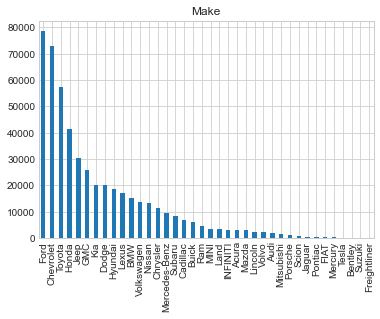

In [10]:
pd.value_counts(data['Make'])
plot = data['Make'].value_counts().plot(kind='bar',
                                            title='Make')

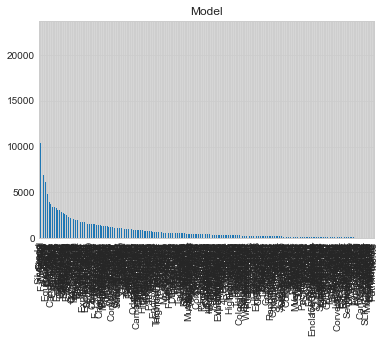

In [11]:
# tabla de frecuencia de Modelo, donde se indetifica que existen muchas categorias y esto no es óptimo para el modelo
pd.value_counts(data['Model'])
plot = data['Model'].value_counts().plot(kind='bar',
                                            title='Model')

In [12]:
## Se deben pasar a Dummies las variables categoricas

data_2 = pd.get_dummies(data[['State','Make','Model']])

print("The original DataFrame is:")
print(data, "\n")

print("DataFrame with Dummies:")
print(data_2)

The original DataFrame is:
        Price  Year  Mileage State       Make        Model
0       21490  2014    31909    MD     Nissan    MuranoAWD
1       21250  2016    25741    KY  Chevrolet  CamaroCoupe
2       20925  2016    24633    SC    Hyundai        Santa
3       14500  2012    84026    OK       Jeep        Grand
4       32488  2013    22816    TN       Jeep     Wrangler
...       ...   ...      ...   ...        ...          ...
499995  16997  2013    40393    TX        BMW            1
499996  11990  2012    91794    WA    Hyundai        Santa
499997  49991  2014    39107    MS       Ford        Super
499998  21888  2010    62556    NH      Dodge          Ram
499999  63973  2017    17653    NJ  Chevrolet  Suburban4WD

[500000 rows x 6 columns] 

DataFrame with Dummies:
        State_ AK  State_ AL  State_ AR  State_ AZ  State_ CA  State_ CO  \
0               0          0          0          0          0          0   
1               0          0          0          0          

In [13]:
data_2['Model_Yukon4WD'].unique()
pd.value_counts(data_2['Model_Yukon4WD'])

0    498448
1      1552
Name: Model_Yukon4WD, dtype: int64

In [14]:
##Consolidar data con dummies y demás variables

data_2 = pd.concat([data, data_2], axis=1)
columns_names = data_2.columns.values
columns_names

array(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model', 'State_ AK',
       'State_ AL', 'State_ AR', 'State_ AZ', 'State_ CA', 'State_ CO',
       'State_ CT', 'State_ DC', 'State_ DE', 'State_ FL', 'State_ GA',
       'State_ HI', 'State_ IA', 'State_ ID', 'State_ IL', 'State_ IN',
       'State_ KS', 'State_ KY', 'State_ LA', 'State_ MA', 'State_ MD',
       'State_ ME', 'State_ MI', 'State_ MN', 'State_ MO', 'State_ MS',
       'State_ MT', 'State_ NC', 'State_ ND', 'State_ NE', 'State_ NH',
       'State_ NJ', 'State_ NM', 'State_ NV', 'State_ NY', 'State_ OH',
       'State_ OK', 'State_ OR', 'State_ PA', 'State_ RI', 'State_ SC',
       'State_ SD', 'State_ TN', 'State_ TX', 'State_ UT', 'State_ VA',
       'State_ VT', 'State_ WA', 'State_ WI', 'State_ WV', 'State_ WY',
       'Make_Acura', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler',
       'Make_Dodge', 'Make_FIAT', 'Make_Ford', 'Make_Freightliner',
   

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [15]:
### Agrupación de variables por frecuencia acumulada

df_s = data_2['State'].value_counts().to_frame()
df_s["acum_1"] = df_s["State"].cumsum()/df_s["State"].sum()*100
state_list=list(df_s[df_s['acum_1']<=70].index)
data_2['State_Otros']=np.where(data_2['State'].isin(state_list),data_2['State'],"OTRO")

In [16]:
df_ma = data_2['Make'].value_counts().to_frame()
df_ma["acum_1"] = df_ma["Make"].cumsum()/df_ma["Make"].sum()*100
Make_list=list(df_ma[df_ma['acum_1']<=70].index)
data_2['Make_Otros']=np.where(data_2['Make'].isin(state_list),data_2['Make'],"OTRO")

In [17]:
df_mo = data_2['Model'].value_counts().to_frame()
df_mo["acum_1"] = df_mo["Model"].cumsum()/df_mo["Model"].sum()*100
Model_list=list(df_mo[df_mo['acum_1']<=70].index)
data_2['Model_Otros']=np.where(data_2['Model'].isin(state_list),data_2['Model'],"OTRO")

In [18]:
data_2

,Price,Year,Mileage,State,Make,Model,State_ AK,State_ AL,State_ AR,State_ AZ,...,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr,State_Otros,Make_Otros,Model_Otros
0,21490,2014,31909,MD,Nissan,MuranoAWD,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO
2,20925,2016,24633,SC,Hyundai,Santa,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO
3,14500,2012,84026,OK,Jeep,Grand,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO
4,32488,2013,22816,TN,Jeep,Wrangler,0,0,0,0,...,0,0,0,0,0,0,0,TN,OTRO,OTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,TX,BMW,1,0,0,0,0,...,0,0,0,0,0,0,0,TX,OTRO,OTRO
499996,11990,2012,91794,WA,Hyundai,Santa,0,0,0,0,...,0,0,0,0,0,0,0,WA,OTRO,OTRO
499997,49991,2014,39107,MS,Ford,Super,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO
499998,21888,2010,62556,NH,Dodge,Ram,0,0,0,0,...,0,0,0,0,0,0,0,OTRO,OTRO,OTRO


In [19]:
data_2.drop(['State','Make','Model'], inplace=True, axis=1)

In [20]:
data_2.drop(['State_ TX', 'State_ CA','State_ FL','State_ GA','State_ NC', 'State_ IL',
 'State_ VA',
 'State_ PA',
 'State_ NY',
 'State_ NJ',
 'State_ OH',
 'State_ CO',
 'State_ WA',
 'State_ AZ',
 'State_ TN',
 'State_ MA',
 'State_ MD',
 'State_ MO',
 'State_ IN',
 'State_ KY'], inplace=True, axis=1)

In [21]:
data_2.drop(['Make_Ford',
 'Make_Chevrolet',
 'Make_Toyota',
 'Make_Honda',
 'Make_Jeep',
 'Make_GMC',
 'Make_Kia',
 'Make_Dodge',
 'Make_Hyundai',
 'Make_Lexus',
 'Make_BMW'], inplace=True, axis=1)

In [22]:
data_2.drop(['Model_Silverado',
'Model_Grand',
'Model_Sierra',
'Model_Accord',
'Model_F-1504WD',
'Model_Wrangler',
'Model_Civic',
'Model_3',
'Model_Jetta',
'Model_Santa',
'Model_FusionSE',
'Model_EquinoxFWD',
'Model_CamrySE',
'Model_Super',
'Model_CorollaLE',
'Model_MalibuLT',
'Model_F-150XLT',
'Model_Town',
'Model_Ram',
'Model_CamaroCoupe',
'Model_Cooper',
'Model_SorentoLX',
'Model_ExplorerXLT',
'Model_Rover',
'Model_EscapeSE',
'Model_OptimaLX',
'Model_5',
'Model_Tundra',
'Model_RX',
'Model_EquinoxAWD',
'Model_F-1502WD',
'Model_CamryLE',
'Model_CR-VEX-L',
'Model_Passat4dr',
'Model_TerrainFWD',
'Model_CruzeSedan',
'Model_Elantra4dr',
'Model_Outback2.5i',
'Model_CorollaS',
'Model_200Limited',
'Model_EscapeFWD',
'Model_EdgeSEL',
'Model_AcadiaFWD',
'Model_ES',
'Model_E-ClassE350',
'Model_FocusSE',
'Model_Tahoe4WD',
'Model_Sonata4dr',
'Model_AcadiaAWD',
'Model_CTS',
'Model_CR-VLX',
'Model_IS',
'Model_OdysseyEX-L',
'Model_C-ClassC300',
'Model_MuranoAWD',
'Model_Camry4dr',
'Model_Yukon',
'Model_TraverseFWD',
'Model_CR-VEX',
'Model_Tacoma4WD',
'Model_Escape4WD',
'Model_CivicLX',
'Model_PatriotSport',
'Model_Malibu1LT',
'Model_G37',
'Model_Altima4dr',
'Model_Tacoma2WD',
'Model_RXRX',
'Model_Tahoe2WD',
'Model_ExplorerLimited',
'Model_Transit',
'Model_MalibuLS',
'Model_TerrainAWD',
'Model_EnclaveLeather',
'Model_PilotEX-L',
'Model_F-150Lariat',
'Model_Impreza',
'Model_Suburban4WD',
'Model_SRXLuxury',
'Model_Prius',
'Model_25004WD',
'Model_Yukon4WD',
'Model_AccordEX-L',
'Model_Explorer4WD',
'Model_CompassSport',
'Model_Soul+',
'Model_OptimaEX',
'Model_TraverseAWD',
'Model_F-150SuperCrew',
'Model_Legacy2.5i',
'Model_SedonaLX',
'Model_ForteLX',
'Model_Mustang2dr',
'Model_CamryXLE',
'Model_CorollaL',
'Model_MustangGT',
'Model_CherokeeLimited',
'Model_LaCrosseFWD',
'Model_SonataSE',
'Model_PatriotLatitude',
'Model_ChallengerR/T',
'Model_M-ClassML350',
'Model_ChargerSXT',
'Model_Fusion4dr',
'Model_JourneySXT',
'Model_Express',
'Model_ESES',
'Model_JourneyFWD',
'Model_Corvette2dr',
'Model_F-150XL',
'Model_Golf',
'Model_Wrangler4WD',
'Model_15004WD',
'Model_ColoradoCrew',
'Model_CompassLatitude',
'Model_Corolla4dr',
'Model_RAV4XLE',
'Model_ImpalaLT',
'Model_AccordLX',
'Model_SportageLX',
'Model_ISIS',
'Model_SonataLimited',
'Model_TacomaBase',
'Model_Suburban2WD',
'Model_WranglerSport',
'Model_C-ClassC',
'Model_PriusTwo',
'Model_Elantra',
'Model_300300C',
'Model_Malibu',
'Model_Yukon2WD',
'Model_C-Class4dr',
'Model_Escalade',
'Model_TahoeLT',
'Model_X3xDrive28i',
'Model_CR-V4WD',
'Model_Outlander',
'Model_Charger4dr',
'Model_Malibu4dr',
'Model_TucsonFWD',
'Model_MDXAWD',
'Model_SonicSedan',
'Model_GS',
'Model_EdgeLimited',
'Model_SiennaXLE',
'Model_Camaro2dr',
'Model_RAV4LE',
'Model_Expedition',
'Model_Pilot4WD',
'Model_OdysseyTouring',
'Model_Murano2WD',
'Model_FusionHybrid',
'Model_7',
'Model_4Runner4WD',
'Model_CamaroConvertible',
'Model_Impala4dr',
'Model_ElantraLimited',
'Model_TundraSR5',
'Model_Challenger2dr',
'Model_4RunnerSR5',
'Model_ChargerSE',
'Model_Prius5dr',
'Model_AvalonXLE',
'Model_HighlanderFWD',
'Model_GX',
'Model_DurangoAWD',
'Model_Maxima4dr',
'Model_Sienna5dr',
'Model_RAV4Limited',
'Model_X5xDrive35i',
'Model_CivicEX',
'Model_ExplorerFWD',
'Model_Econoline',
'Model_TaurusSEL',
'Model_Pathfinder4WD',
'Model_X5AWD',
'Model_PriusThree',
'Model_Camry',
'Model_RAV44WD'], inplace=True, axis=1)


In [23]:
columns_names = data_2.columns.values
columns_names

array(['Price', 'Year', 'Mileage', 'State_ AK', 'State_ AL', 'State_ AR',
       'State_ CT', 'State_ DC', 'State_ DE', 'State_ HI', 'State_ IA',
       'State_ ID', 'State_ KS', 'State_ LA', 'State_ ME', 'State_ MI',
       'State_ MN', 'State_ MS', 'State_ MT', 'State_ ND', 'State_ NE',
       'State_ NH', 'State_ NM', 'State_ NV', 'State_ OK', 'State_ OR',
       'State_ RI', 'State_ SC', 'State_ SD', 'State_ UT', 'State_ VT',
       'State_ WI', 'State_ WV', 'State_ WY', 'Make_Acura', 'Make_Audi',
       'Make_Bentley', 'Make_Buick', 'Make_Cadillac', 'Make_Chrysler',
       'Make_FIAT', 'Make_Freightliner', 'Make_INFINITI', 'Make_Jaguar',
       'Make_Land', 'Make_Lincoln', 'Make_MINI', 'Make_Mazda',
       'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_Pontiac', 'Make_Porsche', 'Make_Ram',
       'Make_Scion', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla',
       'Make_Volkswagen', 'Make_Volvo', 'Model_1', 'Model_15002WD',
       'Model_1500Laram

In [24]:
data_2.shape

(500000, 410)

In [25]:
pd.DataFrame(data_2.columns).to_csv('variables_precio.csv')

In [26]:
## Selección de variables

X = data_2.drop(['Price'], axis=1)
y = data_2['Price']


In [27]:
datos = data_2.iloc[:,0:410]
X = datos.iloc[:,1:]
y = datos.iloc[:,0]


In [28]:
# ## Regresión Lineal

# datos = data_2.iloc[:,0:410]
# X = datos.iloc[:,1:]
# y = datos.iloc[:,0]


# def cv_manual(X,y,modelo,n_particion):
#     def cv_index(X, n_particion):
#         n = X.shape[0]
#         fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
#         fold_sizes[:n % n_particion] += 1
#         indices = np.arange(n)
#         actual = 0
#         indices_train_test = list()
#         #Yield retorna un generator
#         for fold_size in fold_sizes:
#             inicio, parar = actual, actual + fold_size
#             yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
#             actual = parar
        
#     # usa los indices creados en la primera funcion para las iteraciones (cv_index)
#     ind_test_train= list(cv_index(X,n_particion))  
#     metrica_lista = []
#     for j in range(n_particion):
#         index_test  =  ind_test_train[j][0] 
#         index_train =  ind_test_train[j][1]
        
#         X_train = X.iloc[index_train,]
#         y_train = y.iloc[index_train,]
        
#         modelo.fit(X_train,y_train)
        
#         X_test = X.iloc[index_test,]
#         y_test = y.iloc[index_test,]
        
#         #mean squared error
#         metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
#     return metrica_lista , np.mean(metrica_lista)
    
# cv_manual(X,y,LinearRegression(),10)




In [29]:
## Decision Tree using scikit-learn

datos = data_2.iloc[:,0:10]
X = datos.iloc[:1000,1:]
y = datos.iloc[:1000,0]

def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
cv_manual(X,y,DecisionTreeRegressor(random_state=0),10)






([12593.59701634128,
  13207.294814987663,
  12637.302156314852,
  11295.02003229742,
  15485.90339599211,
  11138.762613953131,
  10690.230388069285,
  10708.40213337172,
  10801.475706124604,
  11685.209997257218],
 12024.319825470928)

In [30]:
modelo=DecisionTreeRegressor()
modelo.fit(X,y)

DecisionTreeRegressor()

In [31]:
import pickle

In [32]:
pickle.dump(modelo,open('precio_cars.pkl','wb'))

In [33]:
# ## Bagging

# datos = data_2.iloc[:,0:10]
# X = datos.iloc[:10000,1:]
# y = datos.iloc[:10000,0]

# def cv_manual(X,y,modelo,n_particion):
#     def cv_index(X, n_particion):
#         n = X.shape[0]
#         fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
#         fold_sizes[:n % n_particion] += 1
#         indices = np.arange(n)
#         actual = 0
#         indices_train_test = list()
#         #Yield retorna un generator
#         for fold_size in fold_sizes:
#             inicio, parar = actual, actual + fold_size
#             yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
#             actual = parar
        
#     # usa los indices creados en la primera funcion para las iteraciones (cv_index)
#     ind_test_train= list(cv_index(X,n_particion))  
#     metrica_lista = []
#     for j in range(n_particion):
#         index_test  =  ind_test_train[j][0] 
#         index_train =  ind_test_train[j][1]
        
#         X_train = X.iloc[index_train,]
#         y_train = y.iloc[index_train,]
        
#         modelo.fit(X_train,y_train)
        
#         X_test = X.iloc[index_test,]
#         y_test = y.iloc[index_test,]
        
#         #mean squared error
#         metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
#     return metrica_lista , np.mean(metrica_lista)
    
# cv_manual(X,y,DecisionTreeRegressor(max_depth=3, random_state=1),10)



In [34]:
# for i in range(1,5):
#     cv_manual(X,y,DecisionTreeRegressor(max_depth=i, random_state=1),10)
    
#     print(cv_manual(X,y,DecisionTreeRegressor(max_depth=i, random_state=1),10))

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
